In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software,Version
Python,3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython,7.0.1
OS,Darwin 18.0.0 x86_64 i386 64bit
numpy,1.15.2
dlib,19.16.0
matplotlib,3.0.0
imageio,2.4.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,0.4.1
torchvision,0.2.1


## loading the model

In [ ]:
from gaze import init, ML
args = init(no_cuda=True, batch_size=64, verbose=0)
ml = ML(args)
path = '_Regard.pt'
ml.train(path=path)

Training model...


In [ ]:
ml.device

## running the forward model on the extracted faces

In [ ]:
%matplotlib inline
fig, ax =  ml.dataset.show()

In [6]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [7]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=90.8%


In [8]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

 left right right right right  left  left blink  left  left blink  left  left blink center center blink right center  left blink right  left  left blink  left blink right center blink  left blink right right right right blink blink blink  left center right blink center blink  left blink  left blink center  left blink right blink right right  left  left center right right right center center


In [9]:
fig, ax = ml.show(only_wrong=True)

In [10]:
fig, ax = ml.show(only_wrong=False)

## cross-validation

In [11]:
import os
fname = 'figures/accuracy'
if not os.path.exists(fname + '.pdf'):
    args = init(verbose=0, log_interval=0, epochs=20)
    from gaze import MetaML
    mml = MetaML(args)
    Accuracy = mml.protocol(args, 42)
    print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(figsize=((8, 5)))
    n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
    ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
    ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
    ax.vlines(100, 0, n.max(), 'k', label='max')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Smarts')
    ax.legend(loc='best')
    plt.show() 
    for ext in ['.pdf', '.png']:
        plt.savefig(fname + ext)

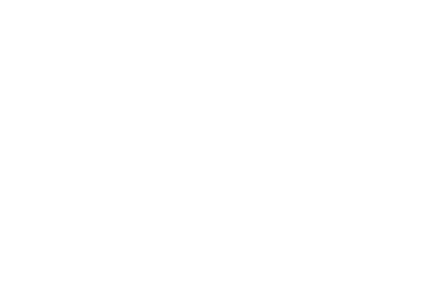

In [12]:
from IPython.display import Image
Image(filename=fname + '.png') 